In [1]:
# Solution set for CS 155 Set 6, 2016/2017
# Authors: Fabian Boemer, Sid Murching, Suraj Nair

import numpy as np

def grad_U(Ui, Yij, Vj, reg, eta):
    """
    Takes as input Ui (the ith row of U), a training point Yij, the column
    vector Vj (jth column of V^T), reg (the regularization parameter lambda),
    and eta (the learning rate).

    Returns the gradient of the regularized loss function with
    respect to Ui multiplied by eta.
    """

    regularization = reg * Ui
    squared_error = (Yij - (np.dot(Ui, Vj))) * Vj
    
    gradient = regularization - squared_error
    result = eta * gradient
    
    return result
    

def grad_V(Vj, Yij, Ui, reg, eta):
    """
    Takes as input the column vector Vj (jth column of V^T), a training point Yij,
    Ui (the ith row of U), reg (the regularization parameter lambda),
    and eta (the learning rate).

    Returns the gradient of the regularized loss function with
    respect to Vj multiplied by eta.
    """
    
    regularization = reg * Vj
    squared_error = (Yij - (np.dot(Ui, Vj))) * Ui
    
    gradient = regularization - squared_error
    result = eta * gradient
    
    return result
    

def get_err(U, V, Y, reg=0.0):
    """
    Takes as input a matrix Y of triples (i, j, Y_ij) where i is the index of a user,
    j is the index of a movie, and Y_ij is user i's rating of movie j and
    user/movie matrices U and V.

    Returns the mean regularized squared-error of predictions made by
    estimating Y_{ij} as the dot product of the ith row of U and the jth column of V^T.
    """
    
    squared_error = 0
    
    for i in range(len(Y)):
        (i, j, Y_ij) = Y[i]
        squared_error += 0.5 * (Y_ij - (np.dot(U[i - 1], V[j - 1])))**2
    
    error = squared_error / (len(Y))
    return error

def train_model(M, N, K, eta, reg, Y, eps=0.0001, max_epochs=300):
    """
    Given a training data matrix Y containing rows (i, j, Y_ij)
    where Y_ij is user i's rating on movie j, learns an
    M x K matrix U and N x K matrix V such that rating Y_ij is approximated
    by (UV^T)_ij.

    Uses a learning rate of <eta> and regularization of <reg>. Stops after
    <max_epochs> epochs, or once the magnitude of the decrease in regularized
    MSE between epochs is smaller than a fraction <eps> of the decrease in
    MSE after the first epoch.

    Returns a tuple (U, V, err) consisting of U, V, and the unregularized MSE
    of the model.
    """
    
    # Initialize the matrices U and V
    U = np.random.uniform(-0.5, 0.5, (M, K))
    V = np.random.uniform(-0.5, 0.5, (N, K))
    
    # Decrease in MSE after first epoch
    current_MSE = get_err(U, V, Y)
    
    indices = list(range(len(Y)))
    shuffled_indices = np.random.permutation(indices)
        
    for i in range(len(Y)):
        i = shuffled_indices[i]
        (i, j, Y_ij) = Y[i]
        U[i - 1] = U[i - 1] - grad_U(U[i - 1], Y_ij, V[j - 1], reg, eta)
        V[j - 1] = V[j - 1] - grad_V(V[j - 1], Y_ij, U[i - 1], reg, eta)
        
    new_MSE = get_err(U, V, Y)
    first_decrease = (current_MSE - new_MSE)
    current_MSE = new_MSE
    
    decrease = first_decrease
    epoch = 1
    while (epoch < max_epochs and decrease > eps * first_decrease):
        
        indices = list(range(len(Y)))
        shuffled_indices = np.random.permutation(indices)
        
        for i in range(len(Y)):
            i = shuffled_indices[i]
            (i, j, Y_ij) = Y[i]
            U[i - 1] = U[i - 1] - grad_U(U[i - 1], Y_ij, V[j - 1], reg, eta)
            V[j - 1] = V[j - 1] - grad_V(V[j - 1], Y_ij, U[i - 1], reg, eta)
        
        epoch += 1
        new_MSE = get_err(U, V, Y)
        decrease = current_MSE - new_MSE
        current_MSE = new_MSE
    return (U, V, current_MSE)


Training model with M = 943, N = 1682, k = 10, eta = 0.03, reg = 0.0001
0.143610597151
0.0391070558575
0.0244508744727
0.0199338765287
0.01234838222
0.0108114363948
0.00385215654428
0.00772034794344
0.00554163153914
0.00278348508256
-0.00286437098182
Training model with M = 943, N = 1682, k = 20, eta = 0.03, reg = 0.0001
0.177683356839
0.058514643882
0.0323589080635
0.0217405623255
0.0174474600537
0.0150938928015
0.0118223386161
0.0117054581623
0.00628520921506
0.00885647043563
0.00501849918086
0.00392917297986
0.00690871028494
0.00211014271589
0.00347702366848
0.00224188457254
0.00399403266538
-0.000387474722095
Training model with M = 943, N = 1682, k = 30, eta = 0.03, reg = 0.0001
0.201112937182
0.0623106575302
0.0383296940758
0.0256127652868
0.0203406218535
0.0143866276616
0.0160987833841
0.00752604035531
0.00996102217762
0.00697347052365
0.00799785654789
0.00506428924491
0.00308999371555
0.00573401877772
0.00383214594131
0.00396810097246
0.00331673448957
0.00103801473953
0.0021908

0.198691823377
0.0366231637975
0.00923410670195
-0.00764223470891
Training model with M = 943, N = 1682, k = 50, eta = 0.03, reg = 1
0.171329211681
0.0311336115477
-0.000841514918938
Training model with M = 943, N = 1682, k = 100, eta = 0.03, reg = 1
0.143587805546
0.0639270793128
-0.00806569864328


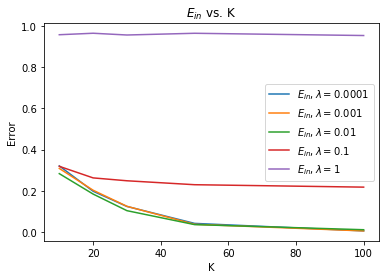

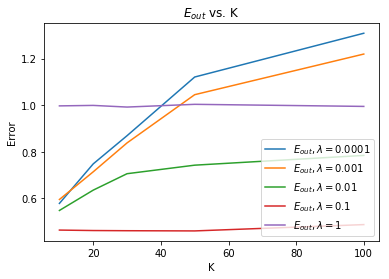

In [9]:
# Solution set for CS 155 Set 6, 2016/2017
# Authors: Fabian Boemer, Sid Murching, Suraj Nair

import numpy as np
import matplotlib.pyplot as plt
		
def main():
    Y_train = np.loadtxt('data/train.txt').astype(int)
    Y_test = np.loadtxt('data/test.txt')	.astype(int)
	
    M = max(max(Y_train[:,0]), max(Y_test[:,0])).astype(int) # users
    N = max(max(Y_train[:,1]), max(Y_test[:,1])).astype(int) # movies
    Ks = [10,20,30,50,100]
	
    regs = [10**-4, 10**-3, 10**-2, 10**-1, 1]
    eta = 0.03 # learning rate
    E_ins = []
    E_outs = []
	
    # Use to compute Ein and Eout
    for reg in regs:
        E_ins_for_lambda = []
        E_outs_for_lambda = []
        
        for k in Ks:
            print("Training model with M = %s, N = %s, k = %s, eta = %s, reg = %s"%(M, N, k, eta, reg))
            U,V, e_in = train_model(M, N, k, eta, reg, Y_train)
            E_ins_for_lambda.append(e_in)
            eout = get_err(U, V, Y_test)
            E_outs_for_lambda.append(eout)
            
        E_ins.append(E_ins_for_lambda)
        E_outs.append(E_outs_for_lambda)
	

    # Plot values of E_in across k for each value of lambda
    for i in range(len(regs)):
        plt.plot(Ks, E_ins[i], label='$E_{in}, \lambda=$'+str(regs[i]))
    plt.title('$E_{in}$ vs. K')
    plt.xlabel('K')
    plt.ylabel('Error')
    plt.legend()
    plt.show() # added this
    plt.savefig('2e_ein.png')	
    plt.clf()

    # Plot values of E_out across k for each value of lambda
    for i in range(len(regs)):
        plt.plot(Ks, E_outs[i], label='$E_{out}, \lambda=$'+str(regs[i]))
    plt.title('$E_{out}$ vs. K')
    plt.xlabel('K')
    plt.ylabel('Error')
    plt.legend()	
    plt.show() # added this
    plt.savefig('2e_eout.png')		

main()
